In [12]:
import argparse
import os, sys

import matplotlib.pyplot as plt
import mplhep as hep

plt.style.use(hep.style.CMS)

import numpy as np
import pandas as pd

# from progress.bar import IncrementalBar
import yaml
import json

# local files
sys.path.append("./src/")
# from turnon_collection import TurnOnCollection
# from scaling_collection import ScalingCollection
# from plotter import Plotter
# import utils

In [3]:
def load_json(fname):
    with open(fname) as f:
        plot = json.load(f)
        return plot

In [4]:
from glob import glob

## With ratio

In [5]:
def comp_turnons(
    plot1, plot2, sfxs=["v22", "v27"], lss=["-", "--"], keys=None, markers=["o", "s"]
):
    fig, axs = plt.subplots(
        2, 1, figsize=(10, 10), sharex=True, gridspec_kw={"height_ratios": [3, 1]}
    )

    hep.cms.label(ax=axs[0], llabel="Phase-2 Simulation", rlabel="14 TeV")

    if keys is None:
        keys = plot1.keys()
    # or hardcode
    # keys = ["EG"]

    for j, key in enumerate(keys):
        if key in ["xlabel", "ylabel", "watermark"]:
            continue
        if key not in plot1.keys():
            print(f"Warning: {key} not in plot 1 keys. Skipping...")
        if key not in plot2.keys():
            print(f"Warning: {key} not in plot 2 keys. Skipping...")
            continue

        ## plot 1
        plots = [plot1[key], plot2[key]]
        color = f"C{j-3}"
        #         print(color)

        for i, p1 in enumerate(plots):
            sfx = sfxs[i]

            # label = p1["label"] + ", " + sfx
            label = f"{sfx}, {p1['label']}"
            p1["err_kwargs"]["marker"] = markers[i]
            if i == 1:
                p1["err_kwargs"]["markerfacecolor"] = "none"
            #                 mfc='w'

            axs[0].errorbar(
                p1["xbins"],
                p1["efficiency"],
                yerr=p1["efficiency_err"],
                label=label,
                ls=lss[i],
                color=color,
                **(p1["err_kwargs"]),
            )

        #     axs[]
        x = plots[0]["xbins"]
        y = plots[0]["efficiency"]
        d_p1 = dict(zip(x, y))

        x = plots[1]["xbins"]
        y = plots[1]["efficiency"]
        d_p2 = dict(zip(x, y))

        (pd.Series(d_p1) - pd.Series(d_p2)).plot(
            ax=axs[1], label=p1["label"], marker="."
        )

    axs[0].legend(ncol=1)
    axs[1].legend()

    axs[0].set_ylabel(plot1["ylabel"], fontsize="small")

    axs[1].set_xlabel(plot1["xlabel"])
    axs[1].set_ylabel(f"{sfxs[0]} - {sfxs[1]}")

    plt.subplots_adjust(wspace=0, hspace=0)
    for ax in axs:
        ax.grid()

    return fig

In [5]:
# f = comp_turnons(plot1,plot2, sfxs = ["v22","v27"], lss = ["-","--"])

In [6]:
v0_jsons = glob(
    "/eos/user/a/alobanov/www/L1T/Phase2/menu/plots/tools/V27/turnons/*.json"
)

In [8]:
%%capture

v0 = "V27"
v1 = "V22"

outdir = "/eos/user/a/alobanov/www/L1T/Phase2/menu/plots/tools/%svs%s" % (v0, v1)

for v0_json in v0_jsons[:100]:
    #     print("he")

    # v1_json = v0_json.replace("V27","V26")
    v1_json = v0_json.replace(v0, v1)  # .replace("_V26","")
    if not os.path.exists(v1_json):
        print(v1_json + " does not exist")
        continue

    plot1 = load_json(v0_json)
    plot2 = load_json(v1_json)

    print(os.path.basename(v0_json))
    f = comp_turnons(plot1, plot2, sfxs=[v0, v1], lss=["-", "--"])

    outfname = v0_json.replace(v0, "%svs%s" % (v0, v1)).replace(".json", ".png")

    outdir = os.path.dirname(outfname)
    if not os.path.exists(outdir):
        os.makedirs(outdir)

    #     print("here")
    plt.savefig(outfname)

    outfname = outfname.replace(".png", ".pdf")
    plt.savefig(outfname)

In [9]:
len(v0_jsons)

48

# scalings

In [10]:
def comp_scalings(
    plot1, plot2, sfxs=["v22", "v27"], lss=["-", "--"], keys=None, markers=["o", "s"]
):
    fig, axs = plt.subplots(
        2, 1, figsize=(10, 10), sharex=True, gridspec_kw={"height_ratios": [3, 1]}
    )
    hep.cms.label(ax=axs[0], llabel="Phase-2 Simulation", rlabel="14 TeV")

    if keys is None:
        keys = plot1.keys()
    # or hardcode
    # keys = ["EG"]
    #     markers = ["o-","s--"]

    for j, key in enumerate(keys):
        if key in ["xlabel", "ylabel", "watermark"]:
            continue
        if key not in plot1.keys():
            print(f"Warning: {key} not in plot 1 keys. Skipping...")
        if key not in plot2.keys():
            print(f"Warning: {key} not in plot 2 keys. Skipping...")
            continue

        ## plot 1
        plots = [plot1[key], plot2[key]]
        color = f"C{j-1}"

        for i, p1 in enumerate(plots):
            sfx = sfxs[i]

            label = sfx + ", " + p1["label"]

            axs[0].plot(
                p1["xvals"],
                p1["yvals"],
                color=color,
                marker=markers[i],
                label=label,
                ls=lss[i],
                mfc="none" if i == 1 else color,
            )

        x = plots[0]["xvals"]
        y = plots[0]["yvals"]
        d_p1 = dict(zip(x, y))

        x = plots[1]["xvals"]
        y = plots[1]["yvals"]
        d_p2 = dict(zip(x, y))

        (pd.Series(d_p1) - pd.Series(d_p2)).plot(
            ax=axs[1], label=p1["label"], marker="."
        )

    ax = axs[0]
    ax.set_ylabel("95 % Location [GeV]")
    axs[0].legend(fontsize="small")

    #     axs[0].set_ylabel(plot1["ylabel"], fontsize = "x-small")

    #     axs[1].set_xlabel(plot1["xlabel"])
    axs[1].set_ylabel(f"{sfxs[0]} - {sfxs[1]}")
    axs[1].set_xlabel("Threshold [GeV]")

    for ax in axs:
        ax.grid()
    plt.subplots_adjust(wspace=0, hspace=0)
    #     plt.tight_layout()

    return fig

In [11]:
v0_jsons = glob(
    "/eos/user/a/alobanov/www/L1T/Phase2/menu/plots/tools/V27/scalings/*.json"
)
len(v0_jsons)
v0_jsons

['/eos/user/a/alobanov/www/L1T/Phase2/menu/plots/tools/V27/scalings/ElectronsTriggerBarrel.json',
 '/eos/user/a/alobanov/www/L1T/Phase2/menu/plots/tools/V27/scalings/ElectronsTriggerEndcap.json',
 '/eos/user/a/alobanov/www/L1T/Phase2/menu/plots/tools/V27/scalings/HT.json',
 '/eos/user/a/alobanov/www/L1T/Phase2/menu/plots/tools/V27/scalings/JetTurnonBarrel.json',
 '/eos/user/a/alobanov/www/L1T/Phase2/menu/plots/tools/V27/scalings/JetTurnonEndcap.json',
 '/eos/user/a/alobanov/www/L1T/Phase2/menu/plots/tools/V27/scalings/JetTurnonForward.json',
 '/eos/user/a/alobanov/www/L1T/Phase2/menu/plots/tools/V27/scalings/MET.json',
 '/eos/user/a/alobanov/www/L1T/Phase2/menu/plots/tools/V27/scalings/MHT15.json',
 '/eos/user/a/alobanov/www/L1T/Phase2/menu/plots/tools/V27/scalings/MHT30.json',
 '/eos/user/a/alobanov/www/L1T/Phase2/menu/plots/tools/V27/scalings/MuonsTrigger.json',
 '/eos/user/a/alobanov/www/L1T/Phase2/menu/plots/tools/V27/scalings/TauTriggerBarrel.json',
 '/eos/user/a/alobanov/www/L1T/

In [12]:
%%capture
# %matplotlib auto

v0 = "V27"
v1 = "V22"

for v0_json in v0_jsons[:100]:
    print(v0_json)

    v22_json = v0_json.replace(v0, v1)
    if not os.path.exists(v22_json):
        print(v22_json + " does not exist")
        continue

    #     continue

    plot1 = load_json(v0_json)
    plot2 = load_json(v22_json)

    print(os.path.basename(v0_json))
    f = comp_scalings(plot1, plot2, sfxs=[v0, v1], lss=["-", "--"])

    outfname = v0_json.replace(v0, f"{v0}vs{v1}").replace(".json", ".png")

    outdir = os.path.dirname(outfname)
    if not os.path.exists(outdir):
        os.makedirs(outdir)

    plt.savefig(outfname)

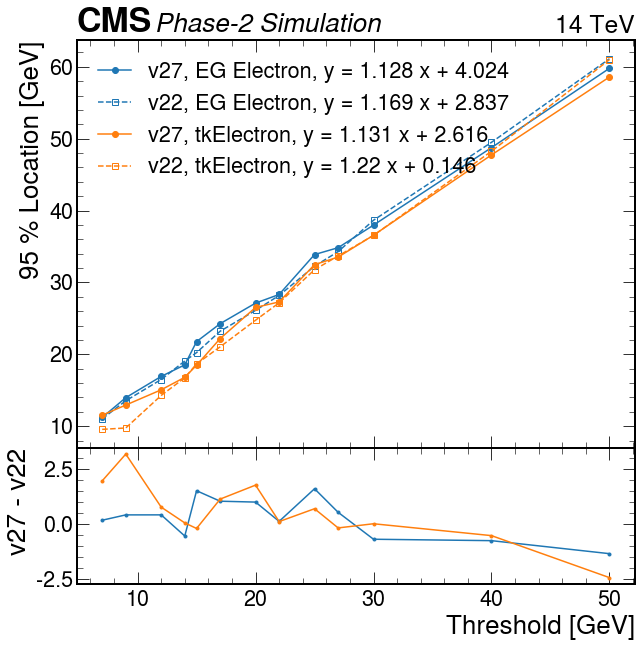

In [29]:
f = comp_scalings(plot1, plot2, sfxs=["v27", "v22"], lss=["-", "--"])

# Combined function for scalings and turnons

In [6]:
def comp_plots(
    plot1,
    plot2,
    sfxs=["v22", "v27"],
    ptype="turnon",
    lss=["-", "--"],
    keys=None,
    markers=["o", "s"],
):
    fig, axs = plt.subplots(
        2, 1, figsize=(10, 12), sharex=True, gridspec_kw={"height_ratios": [3, 1]}
    )
    hep.cms.label(ax=axs[0], llabel="Phase-2 Simulation", rlabel="14 TeV")

    if keys is None:
        keys = plot1.keys()
    # clean keys
    clean_keys = []
    for key in keys:
        if key in ["xlabel", "ylabel", "watermark"]:
            continue
        if key not in plot1.keys():
            print(f"Warning: {key} not in plot 1 keys. Skipping...")
            continue
        if key not in plot2.keys():
            print(f"Warning: {key} not in plot 2 keys. Skipping...")
            continue
        clean_keys.append(key)

    for j, key in enumerate(clean_keys):
        ## plot 1
        plots = [plot1[key], plot2[key]]
        color = f"C{j}"

        for i, p1 in enumerate(plots):
            sfx = sfxs[i]
            label = f"{sfx}, {p1['label']}"

            if ptype == "scalings":
                axs[0].plot(
                    p1["xvals"],
                    p1["yvals"],
                    color=color,
                    marker=markers[i],
                    label=label,
                    ls=lss[i],
                    mfc="none" if i == 1 else color,
                )
            elif ptype == "turnon":
                p1["err_kwargs"]["marker"] = markers[i]

                axs[0].errorbar(
                    p1["xbins"],
                    p1["efficiency"],
                    yerr=p1["efficiency_err"],
                    label=label,
                    ls=lss[i],
                    color=color,
                    mfc="none" if i == 1 else color,
                    **(p1["err_kwargs"]),
                )

        ## Make ratios
        if ptype == "scalings":
            d_p1 = dict(zip(plots[0]["xvals"], plots[0]["yvals"]))
            d_p2 = dict(zip(plots[1]["xvals"], plots[1]["yvals"]))
        elif ptype == "turnon":
            d_p1 = dict(zip(plots[0]["xbins"], plots[0]["efficiency"]))
            d_p2 = dict(zip(plots[1]["xbins"], plots[1]["efficiency"]))

            # add 100% eff line
        #             axs[0].axhline(1,ls = ":", alpha = 0.5, c = "k")

        df_p1 = pd.Series(d_p1)
        df_p2 = pd.Series(d_p2)

        if (df_p1.sum() != 0) and (df_p1.sum() != 0):
            diff = df_p1 - df_p2
            diff /= df_p2
            label = p1["label"].split(",")[0]
            diff.plot(ax=axs[1], label=label, marker=".", color=color)

    # make axis stuff
    axs[0].legend(fontsize="x-small")
    axs[1].set_ylabel(f"({sfxs[0]}-{sfxs[1]})/{sfxs[1]}", fontsize="x-small")
    axs[1].legend(fontsize="x-small")

    if ptype == "scalings":
        axs[0].set_ylabel("95 % Location [GeV]")
        axs[1].set_xlabel("Threshold [GeV]")
    elif ptype == "turnon":
        axs[0].set_ylabel(plot1["ylabel"], fontsize="small")
        axs[1].set_xlabel(plot1["xlabel"])

    #     axs[1].set_ylim(-.1,.1)

    for ax in axs:
        ax.grid()
    plt.tight_layout()
    plt.subplots_adjust(wspace=0, hspace=0)

    return fig

In [22]:
# v0_jsons = [
# #     "/eos/user/a/alobanov/www/L1T/Phase2/menu/plots/tools/V27/scalings/ElectronsTriggerBarrel.json",
#     "/eos/user/a/alobanov/www/L1T/Phase2/menu/plots/tools/V27/turnons/ElectronsMatchingBarrel_-999_V27.json"
# ]

# v0_jsons = glob("/eos/user/a/alobanov/www/L1T/Phase2/menu/plots/tools/V27/*/Electrons*Barrel*.json")
# v0_jsons = glob("/eos/user/a/alobanov/www/L1T/Phase2/menu/plots/tools/V27/tu*/Mu*Eta*.json")
v0_jsons = glob("/eos/user/a/alobanov/www/L1T/Phase2/menu/plots/tools/V27/*/Jet*.json")
len(v0_jsons)
# v0_jsons

8

In [23]:
v0_jsons

['/eos/user/a/alobanov/www/L1T/Phase2/menu/plots/tools/V27/scalings/JetTurnonBarrel.json',
 '/eos/user/a/alobanov/www/L1T/Phase2/menu/plots/tools/V27/scalings/JetTurnonEndcap.json',
 '/eos/user/a/alobanov/www/L1T/Phase2/menu/plots/tools/V27/scalings/JetTurnonForward.json',
 '/eos/user/a/alobanov/www/L1T/Phase2/menu/plots/tools/V27/turnons/JetMatching_Eta_Pt100ToInf_-999_V27.json',
 '/eos/user/a/alobanov/www/L1T/Phase2/menu/plots/tools/V27/turnons/JetMatching_Eta_Pt40To100_-999_V27.json',
 '/eos/user/a/alobanov/www/L1T/Phase2/menu/plots/tools/V27/turnons/JetTurnonBarrel_50_V27.json',
 '/eos/user/a/alobanov/www/L1T/Phase2/menu/plots/tools/V27/turnons/JetTurnonEndcap_50_V27.json',
 '/eos/user/a/alobanov/www/L1T/Phase2/menu/plots/tools/V27/turnons/JetTurnonForward_50_V27.json']

In [24]:
%%time
%%capture

v0 = "V27"
v1 = "V22"

outdir = "https://alobanov.web.cern.ch/L1T/Phase2/menu/plots/tools/%svs%s" % (v0, v1)

for v0_json in v0_jsons[:200]:
    v1_json = v0_json.replace(v0, v1)
    if not os.path.exists(v1_json):
        print(v1_json + " does not exist")
        continue

    plot1 = load_json(v0_json)
    plot2 = load_json(v1_json)

    print(os.path.basename(v0_json))
    f = comp_plots(
        plot1,
        plot2,
        sfxs=[v0, v1],
        lss=["-", "--"],
        #                    lss = ["",""],
        markers=[".", "o"],
        ptype="turnon" if "turnon" in v0_json else "scalings",
    )

    outfname = v0_json.replace(v0, "%svs%s" % (v0, v1)).replace(".json", ".png")

    outdir = os.path.dirname(outfname)
    if not os.path.exists(outdir):
        os.makedirs(outdir)

    print("Saving plot %s" % outfname)
    plt.savefig(outfname)
    # save pdf
    outfname = outfname.replace(".png", ".pdf")
    plt.savefig(outfname)

CPU times: user 21.2 s, sys: 4.88 s, total: 26.1 s
Wall time: 39.7 s
